<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mailbox-Removals" data-toc-modified-id="Mailbox-Removals-1">Mailbox Removals</a></span><ul class="toc-item"><li><span><a href="#Background:" data-toc-modified-id="Background:-1.1">Background:</a></span></li><li><span><a href="#Source-data:" data-toc-modified-id="Source-data:-1.2">Source data:</a></span></li><li><span><a href="#Limitations:" data-toc-modified-id="Limitations:-1.3">Limitations:</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.4">Conclusion</a></span></li><li><span><a href="#Code:" data-toc-modified-id="Code:-1.5">Code:</a></span></li><li><span><a href="#Data-import" data-toc-modified-id="Data-import-1.6">Data import</a></span><ul class="toc-item"><li><span><a href="#County-level-voting-data" data-toc-modified-id="County-level-voting-data-1.6.1">County-level voting data</a></span></li><li><span><a href="#Voter-data" data-toc-modified-id="Voter-data-1.6.2">Voter data</a></span></li><li><span><a href="#Mailbox-data" data-toc-modified-id="Mailbox-data-1.6.3">Mailbox data</a></span></li><li><span><a href="#Total-Number-of-collection-boxes" data-toc-modified-id="Total-Number-of-collection-boxes-1.6.4">Total Number of collection boxes</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-1.7">Analysis</a></span><ul class="toc-item"><li><span><a href="#Outliers" data-toc-modified-id="Outliers-1.7.1">Outliers</a></span></li><li><span><a href="#Net-number-of-collection-boxes-removed" data-toc-modified-id="Net-number-of-collection-boxes-removed-1.7.2">Net number of collection boxes removed</a></span></li><li><span><a href="#Percent-change-in-collection-boxes" data-toc-modified-id="Percent-change-in-collection-boxes-1.7.3">Percent change in collection boxes</a></span></li><li><span><a href="#Population-data" data-toc-modified-id="Population-data-1.7.4">Population data</a></span></li><li><span><a href="#Regression" data-toc-modified-id="Regression-1.7.5">Regression</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import geopandas
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

import matplotlib.ticker as mtick

import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

import statsmodels.api as sm

# Mailbox Removals

This project looks for political bias in the mailboxes that are removed.

## Background:
Some news sources have accused Trump's administration of sabotaging the mail system as a means to influence the 2020 election ([Vox](https://www.vox.com/2020/8/11/21358960/trump-mail-voting-sabotage-explained), [CNN](https://www.cnn.com/2020/08/15/opinions/trump-undermining-post-office-reelection-axelrod/index.html), [Mother Jones](https://www.motherjones.com/2020-elections/2020/08/trump-post-office-sabotage/), [Vanity Fair](https://www.vanityfair.com/news/2020/08/trump-clearly-im-screwing-with-the-post-office-to-sabotage-the-election). Some article specifically address removal of mailboxes, specifically in Portland. While more recently, some news sources report that photos are misleading after learning that some were taken during the process of refurbishing mailboxes. When refurbishing, the mailboxes are generally replaced with a new mailbox in the same trip when they are removed [Vox](https://www.vox.com/recode/2020/8/19/21375303/mailboxes-removed-usps-postal-service-collection-boxes-mail-in-voting).

We can use data to more definatively measure if the Trump administration is removing mailboxes in an effort to sabotage the election.

## Source data:
I will use the following data:

- [`collection_boxes` by Nathaniel Story on GitHub](https://github.com/nstory/collection_boxes). Mr. Story used FOIA to request a full listing of collection boxes from USPS for his site [MailboxLocate](https://mailboxlocate.com/). The FOIA request lists all mailboxes from September 9, 2019. Then he performed a scrape of [USPS PO Locator](https://tools.usps.com/find-location.htm) on 8/15/2020. He then used a script to get a list of removed and added mailboxes.
    - Data reliability: I took a random sample of 15 mailboxes from the scraped dataset and compared them with the USPS Mailbox Locator. All instances matched. Because I do not have access to USPS data, I did not perform a completness test to ensure that every mailbox controlled by USPS is included in the Mailbox Locator. According to Mr. Story's GitHub page, he compared a scrape to the FOIA information and was able to determine that the scrape was reliably reading complete information.
    - Mr. Story and I independently noted a large number of collection boxes removed from Washington D.C. Because it is such an outlier, it influences many analyses. In some instances I exclude Washington D.C and disclose it in the individual analysis. If there is no note on the analysis, I am using the full dataset.
    
- [2018 TIGER/Line Shapefiles, US Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2018.html) I used the US census projection of shapefiles. I chose 2018 so the data could be easily compared with the 2018 ACS population data.
- [American Community Survey, 2018: 1-Year Estimates, Table B01003, US Census Bureau](https://data.census.gov/cedsci/table?q=population&tid=ACSDT1Y2018.B01003&hidePreview=false) This table gives population estimates by county.
    - Data reliability: I did *not* consider margins of error, but only the US Census best estimate. Because there is only survey data and the last Census is from 2010, there are relatively large margins of error for smaller communities.
- [County Presidential Returns 200-2016](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ) While this dataset contains results from multiple elections, I will only consider the results from 2016 election.
    - Note on level of analysis: I attempted to perform this analysis using voting precinct data which is more specific than county level data. At the time of compiling this project, while all precinct results were available, not all shapefiles were available. Therefore the analysis would have omitted some states entirely. County level data is the most granular election data available at the time.
    
## Limitations:
This analysis only considers the change in post office locations; it does not consider potentially important ways of measuring the effectiveness of the Postal Service. Other ways to measure success are delivery times, wait times in Post Offices, how accessible Post Offices are. Further, if the Post Office removes collection boxes without updating their website, it would not be reflected in this analysis.

## Conclusion
There is no evidence of bias trends. Collection boxes are removed from both Democrat and Republican communities in approximately equal amounts. Direct comparisons are difficult because many Democratic counties tend to be large population centers. Large population centers, in general, have more collection boxes, and therefore saw more collection boxes removed. However, when considering percent changes, and changes based on population size, there is no evidence of bias.

When considering only net change in the the number of mailboxes, Democrat counties have more mailboxes removed, but in general, they have more mailboxes to begin with.

Washington D.C, is an interesting case seeing nearly 80% of collection boxes removed, according to Mr. Story's data. I believe this to be irrelevant based on the electoral college system. Washington D.C. overwhelmingly supported Clinton in 2016 (Trump received fewer than 5% of overall votes). Also, Washington D.C. is not divided into multiple counties. However Washington D.C. county votes, so votes all of Washington D.C. electoral college votes. Even if Trump successfully suppressed 90% of all Clinton voters, the electoral votes for Washington D.C. would have been awarded to Clinton. I do not believe removing mailboxes from Washington D.C. specially is intended to interfere with the presidential election.

## Code:

## Data import
### County-level voting data

The following block of code imports the 2018 US Census Shapefile and plots it to confirm it was imported correctly.

  STATEFP  COUNTYFP  COUNTYNS  GEOID       NAME          NAMELSAD LSAD  \
0      31        39  00835841  31039     Cuming     Cuming County   06   
1      53        69  01513275  53069  Wahkiakum  Wahkiakum County   06   
2      35        11  00933054  35011    De Baca    De Baca County   06   
3      31       109  00835876  31109  Lancaster  Lancaster County   06   
4      31       129  00835886  31129   Nuckolls   Nuckolls County   06   

  CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT       ALAND    AWATER  \
0      H1  G4020  None   None     None        A  1477652222  10690952   
1      H1  G4020  None   None     None        A   680956809  61588406   
2      H1  G4020  None   None     None        A  6016819484  29089486   
3      H1  G4020   339  30700     None        A  2169287528  22832516   
4      H1  G4020  None   None     None        A  1489645187   1718484   

      INTPTLAT      INTPTLON  \
0  +41.9158651  -096.7885168   
1  +46.2946377  -123.4244583   
2  +34.3592729  -104

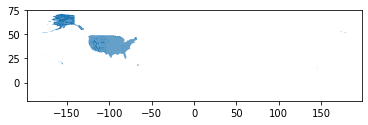

In [2]:
source = 'source data/us county shapefile/tl_2018_us_county.shp'

county = geopandas.read_file(source)
county['COUNTYFP'] = county['COUNTYFP'].astype(int)
county['GEOID'] = county['GEOID'].astype(int)

print(county.head())
county.plot()

### Voter data
The following block of code imports the 2016 presidential election results, then merges it with the shapefile.

In [3]:
source = 'source data/county presidential results/countypres_2000-2016.csv'
county_vote = pd.read_csv(source).dropna(subset=['FIPS'])
county_vote['FIPS'] = county_vote['FIPS'].astype(int)
cv_voi = ['party','candidatevotes','totalvotes','FIPS']

mask = county_vote['year'] == 2016
c2016 = county_vote[mask].fillna(
    {'party':'na','candidatevotes':0}).pivot_table(values='candidatevotes',columns='party',index='FIPS')

vote_cols = c2016.columns
c2016 = c2016.reset_index().rename(columns={'FIPS':'GEOID'})
c2016

party  GEOID  democrat      na  republican
0       1001    5936.0   865.0     18172.0
1       1003   18458.0  3874.0     72883.0
2       1005    4871.0   144.0      5454.0
3       1007    1874.0   207.0      6738.0
4       1009    2156.0   573.0     22859.0
...      ...       ...     ...         ...
3150   56037    3231.0  1745.0     12154.0
3151   56039    7314.0  1392.0      3921.0
3152   56041    1202.0  1114.0      6154.0
3153   56043     532.0   371.0      2911.0
3154   56045     299.0   194.0      3033.0

[3155 rows x 4 columns]

To compute how much a county leaned Democrat or Republican, I calculated the percent of votes for Trump--labeled `r/(rd)` in the data. I excluded any votes for third party candidates so that Republican vs. Democrat could be shown with a single variable.

Using this method if `r/(rd)`$ > .5$ then the county voted from Trump. If `r/(rd)`$< .5$, the county voted for Clinton.

In [4]:
cdf2016=county[['GEOID','NAME','geometry']].merge(c2016,on='GEOID')
cdf2016['r/(rd)'] = cdf2016['republican'] / (cdf2016['republican']+cdf2016['democrat'])
cdf2016

GEOID       NAME                                           geometry  \
0     31039     Cuming  POLYGON ((-97.01952 42.00410, -97.01952 42.004...   
1     53069  Wahkiakum  POLYGON ((-123.43639 46.23820, -123.44759 46.2...   
2     35011    De Baca  POLYGON ((-104.56739 33.99757, -104.56772 33.9...   
3     31109  Lancaster  POLYGON ((-96.91075 40.78494, -96.91075 40.790...   
4     31129   Nuckolls  POLYGON ((-98.27367 40.08940, -98.27367 40.089...   
...     ...        ...                                                ...   
3109  13123     Gilmer  POLYGON ((-84.65478 34.66559, -84.65488 34.669...   
3110  27135     Roseau  POLYGON ((-96.40466 48.80528, -96.40467 48.813...   
3111  28089    Madison  POLYGON ((-90.09363 32.70763, -90.09360 32.707...   
3112  48227     Howard  POLYGON ((-101.69227 32.27106, -101.69221 32.2...   
3113  54099      Wayne  POLYGON ((-82.59529 38.36978, -82.59515 38.369...   

      democrat       na  republican    r/(rd)  
0        719.0    233.0      3122.0  0.812809  
1        832.0    182.0      1344.0  0.617647  
2        193.0     97.0       620.0  0.762608  
3      61898.0  12737.0     61588.0  0.498745  
4        353.0    126.0      1726.0  0.830207  
...        ...      ...         ...       ...  
3109    1965.0    331.0     10477.0  0.842067  
3110    1856.0    497.0      5451.0  0.745997  
3111   20343.0   1194.0     28265.0  0.581489  
3112    1770.0    316.0      6637.0  0.789461  
3113    3357.0    673.0     11152.0  0.768626  

[3114 rows x 7 columns]

To visualize the shapefiles, I create a map with election results and compared it to the map from the [NY times](https://www.nytimes.com/elections/2016/results/president)(Screenshot below).

Visually, this map looks similar to the NY times map with two exceptions.First, Oglala county South Dakota which for some reason didn't get plotted. Second, the US Census TIGER lines include parts of lake Michigan. I'm assuming there are no mailboxes on the lake. For this reason, I will not consider population density.

<Figure size 432x288 with 0 Axes>

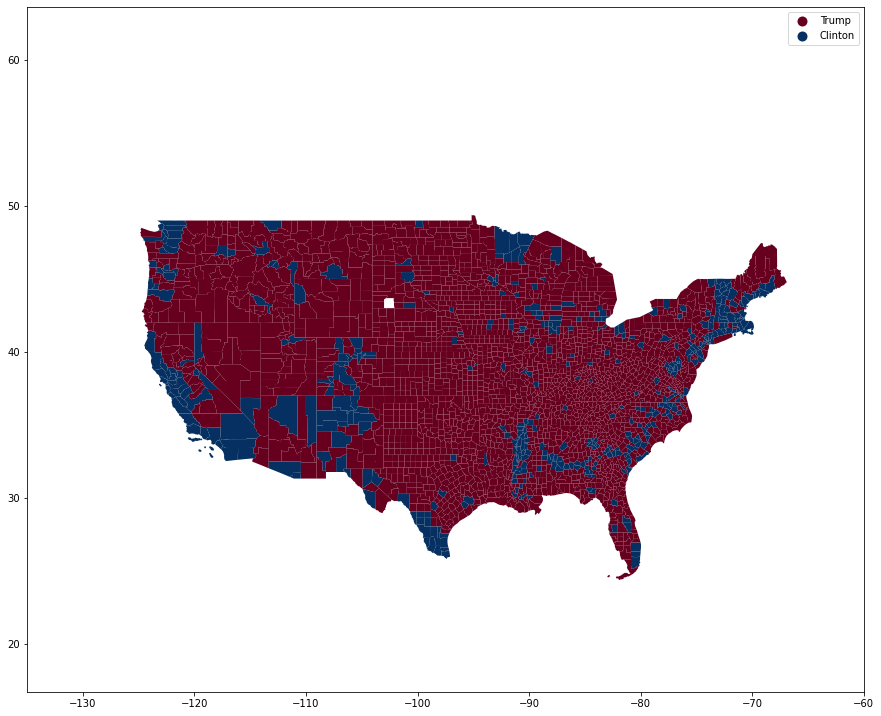

In [5]:
mask = (cdf2016['republican'] > cdf2016['democrat']) & (cdf2016['republican'] > cdf2016['na'])
cdf2016.loc[mask,'color'] = 'Trump'

mask = (cdf2016['democrat'] > cdf2016['republican']) & (cdf2016['democrat'] > cdf2016['na'])
cdf2016.loc[mask,'color'] = 'Clinton'

plt.figure()

f,ax = plt.subplots(1,1)

f.set_figheight(15)
f.set_figwidth(15)

ax.set_xlim(-135,-60)
cdf2016.plot(column='color',ax=ax,
             legend=True,cmap='RdBu',
             categories=['Trump','Clinton']
            )


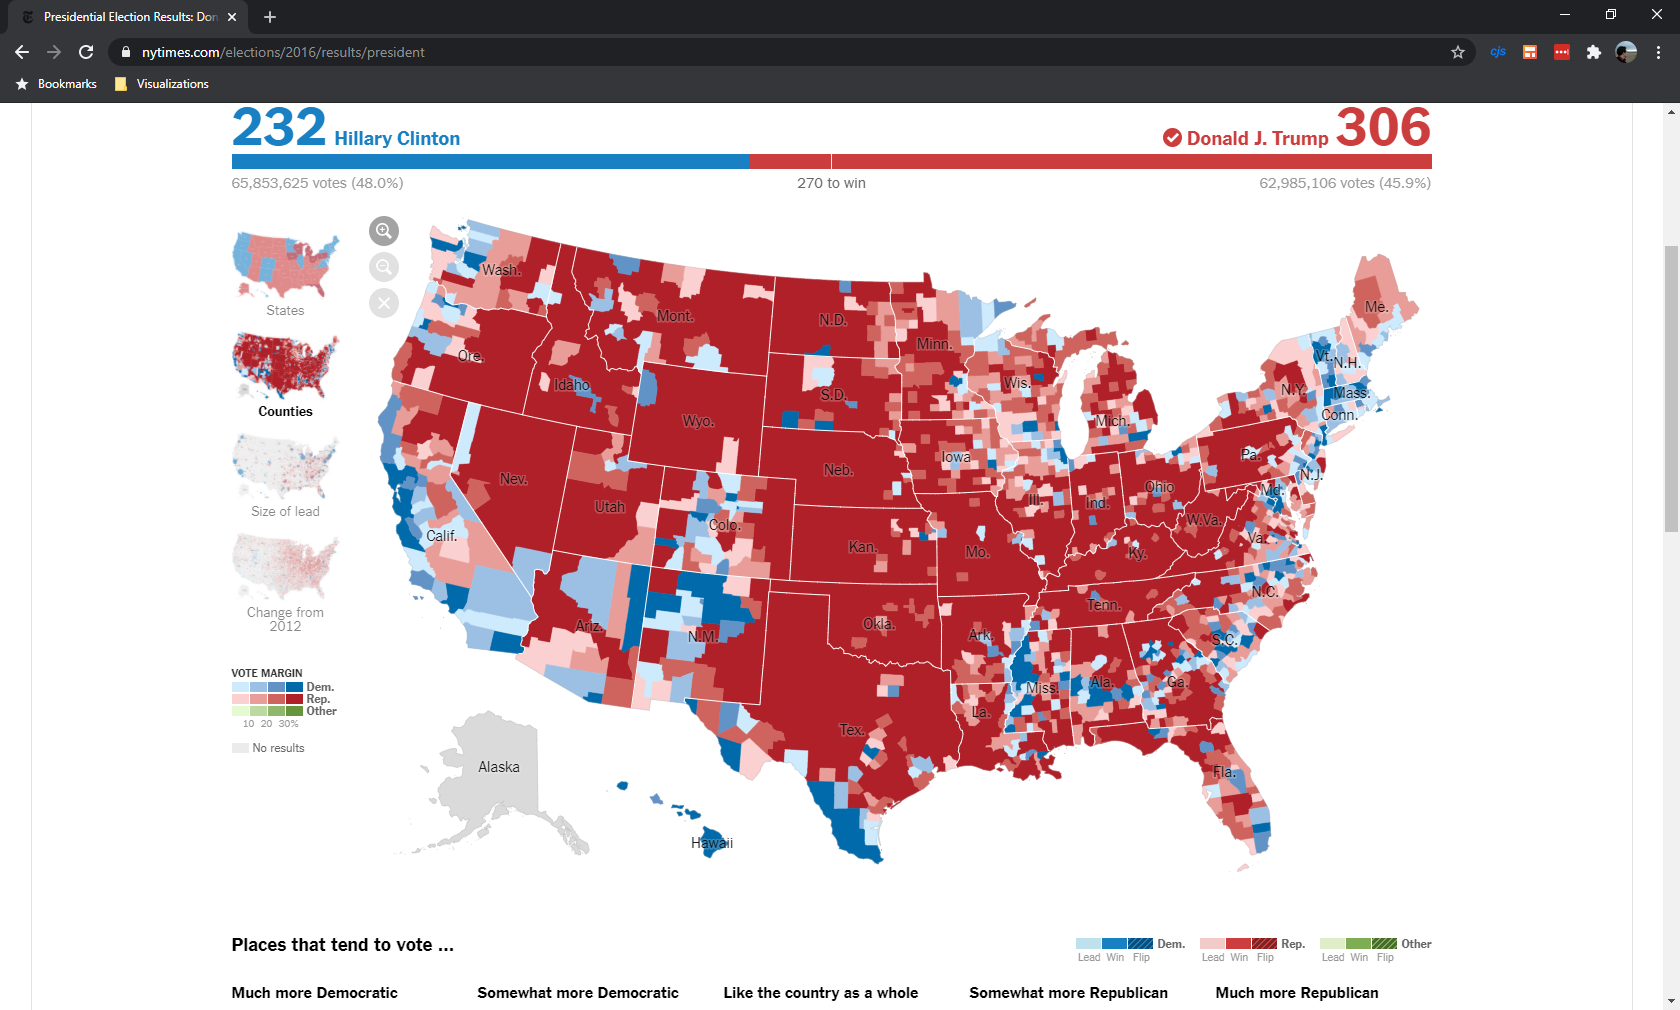

### Mailbox data

The following block of code imports a list of removed mailboxes based on Mr. Story's data. Then it plots them.

5


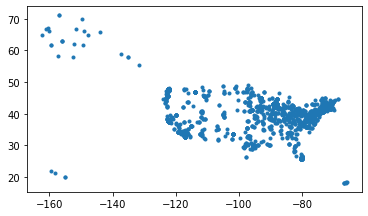

In [6]:
removed = pd.read_csv('source data/removed_2019_to_2020.csv')
mask = removed[['LONGITUDE','LATITUDE']].isna().any(axis=1)
print(mask.sum())
removed = removed[~mask].reset_index(drop=True)

removed = geopandas.GeoDataFrame(
    removed, geometry=geopandas.points_from_xy(removed['LONGITUDE'], removed['LATITUDE']))

removed['net'] = -1
removed.plot(marker='.')

Next, I use a spatial join to determine the county from which the mailboxes were removed.

In [7]:
cdf2016_voi = ['NAME','GEOID','r/(rd)','geometry']

res_r = geopandas.sjoin(
    left_df=cdf2016[cdf2016_voi],
    right_df=removed[['net','geometry']].set_crs("EPSG:4269"),
    how='right',op='contains'
)

I printed a list of mailboxes that could not be mapped to an individual county.

In [8]:
mask = res_r['r/(rd)'].isna()

res_r[mask]

index_left NAME  GEOID  r/(rd)  net                     geometry
0            NaN  NaN    NaN     NaN   -1   POINT (-66.94030 17.96564)
1            NaN  NaN    NaN     NaN   -1   POINT (-66.94030 17.96564)
2            NaN  NaN    NaN     NaN   -1   POINT (-66.93218 17.97300)
3            NaN  NaN    NaN     NaN   -1   POINT (-66.11351 17.98469)
4            NaN  NaN    NaN     NaN   -1   POINT (-66.08590 18.39883)
5            NaN  NaN    NaN     NaN   -1   POINT (-66.00376 18.42890)
2998         NaN  NaN    NaN     NaN   -1  POINT (-159.54538 61.58328)
2999         NaN  NaN    NaN     NaN   -1  POINT (-159.54538 61.58328)
3000         NaN  NaN    NaN     NaN   -1  POINT (-157.37390 58.21180)
3001         NaN  NaN    NaN     NaN   -1  POINT (-156.07897 62.97139)
3002         NaN  NaN    NaN     NaN   -1  POINT (-156.07897 62.97139)
3003         NaN  NaN    NaN     NaN   -1  POINT (-156.07897 62.97139)
3004         NaN  NaN    NaN     NaN   -1  POINT (-152.50102 57.92259)
3005         NaN  NaN    NaN     NaN   -1  POINT (-149.46269 61.58248)
3006         NaN  NaN    NaN     NaN   -1  POINT (-152.06605 61.98424)
3007         NaN  NaN    NaN     NaN   -1  POINT (-147.81250 64.85495)
3008         NaN  NaN    NaN     NaN   -1  POINT (-156.78727 71.29263)
3009         NaN  NaN    NaN     NaN   -1  POINT (-156.78727 71.29263)
3010         NaN  NaN    NaN     NaN   -1  POINT (-151.51164 66.91886)
3011         NaN  NaN    NaN     NaN   -1  POINT (-160.06070 66.01637)
3012         NaN  NaN    NaN     NaN   -1  POINT (-144.07111 65.82185)
3013         NaN  NaN    NaN     NaN   -1  POINT (-149.62893 70.06632)
3014         NaN  NaN    NaN     NaN   -1  POINT (-162.25460 64.74171)
3015         NaN  NaN    NaN     NaN   -1  POINT (-160.43165 66.97013)
3016         NaN  NaN    NaN     NaN   -1  POINT (-161.04653 66.83259)
3017         NaN  NaN    NaN     NaN   -1  POINT (-149.09137 66.00606)
3018         NaN  NaN    NaN     NaN   -1  POINT (-137.17723 58.73631)
3019         NaN  NaN    NaN     NaN   -1  POINT (-135.21846 57.77758)
3020         NaN  NaN    NaN     NaN   -1  POINT (-135.21846 57.77758)
3021         NaN  NaN    NaN     NaN   -1  POINT (-131.63650 55.33909)

I manually looked up these counties and in all instances, they are part of Puerto Rico, or the Alaska (usually near a body of water), There are not enough observations to alter the results, so I am going to ignore them.

<img src='./image/-66 17.png'></img>
<img src='./image/-131 55.png'></img>

The following block of code also adds the number of mailboxes added to calculate the net change in mailboxes.

0


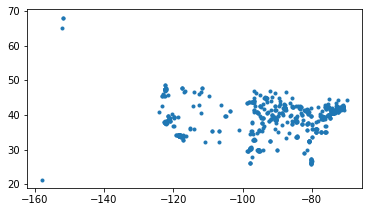

In [9]:
added = pd.read_csv('source data/added_2019_to_2020.csv')
mask = added[['LONGITUDE','LATITUDE']].isna().any(axis=1)
print(mask.sum())
added = added[~mask].reset_index(drop=True)

added = geopandas.GeoDataFrame(
    added, geometry=geopandas.points_from_xy(added['LONGITUDE'], added['LATITUDE']))

added['net'] = 1 # Shows number added

res_a = geopandas.sjoin(
    left_df=cdf2016[cdf2016_voi],
    right_df=added[['net','geometry']].set_crs("EPSG:4269"),
    how='right',op='contains'
)


added.plot(marker='.')

The mailboxes that cannot be mapped to a county are similar to those from the missing mailboxes.

In [10]:
mask = res_a['r/(rd)'].isna()

res_a[mask]

index_left NAME  GEOID  r/(rd)  net                     geometry
660         NaN  NaN    NaN     NaN    1  POINT (-152.08034 65.17060)
661         NaN  NaN    NaN     NaN    1  POINT (-151.73418 68.14004)
662         NaN  NaN    NaN     NaN    1  POINT (-151.73418 68.14004)

Finally, we aggregate mailboxes added with mailboxes removed.

In [11]:
net = pd.concat((res_a,res_r))

### Total Number of collection boxes
So I can calculate net change, I also included the total number of mailboxes. Just like removals and additions, I used a spatial join. Note that I am only importing the number of mailboxes from the FOIA request on 9/27/2019

Removed 19 records with N/A values.


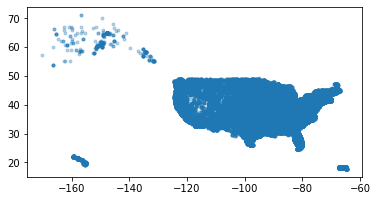

In [12]:
source = './source data/foia_2019-09-27/coll report (reformat).xlsx'

# Note I had to open the original excel file then save as to get pandas to read it correctly.
# When opening the original file, I received an XLRD format unsupported error.I made no change
# or modification to the data.

total = pd.read_excel(source)
mask = total[['LONGITUDE','LATITUDE']].isna().any(axis=1)
print('Removed {:} records with N/A values.'.format(mask.sum()))
total.dropna(subset=['LATITUDE','LONGITUDE'],inplace=True)

total = geopandas.GeoDataFrame(
    total, geometry=geopandas.points_from_xy(total['LONGITUDE'], total['LATITUDE']))

total['total_boxes'] = 1
total.plot(marker='.',alpha=.3)

The following block of code merges both datasets into `tot_geoid`.

In [13]:
tot_geoid = geopandas.sjoin(
    left_df=cdf2016[cdf2016_voi],
    right_df=total[['total_boxes','geometry']].set_crs("EPSG:4269"),
    how='right',op='contains'
)


tot_geoid = tot_geoid.groupby('GEOID').agg(
        {'r/(rd)':'mean','total_boxes':'sum'}
    ).reset_index().merge(
    net.groupby('GEOID').agg({'net':'sum','NAME':'first'}).reset_index(),
    on='GEOID'
    
)
tot_geoid

GEOID    r/(rd)  total_boxes  net        NAME
0     1073.0  0.462102          464   -1   Jefferson
1     1089.0  0.587625          145    0     Madison
2     1101.0  0.365942          162   -1  Montgomery
3     1103.0  0.769101           52   -1      Morgan
4     1125.0  0.600403          122    1  Tuscaloosa
..       ...       ...          ...  ...         ...
605  55131.0  0.712678           74   -2  Washington
606  55133.0  0.642794          248    0    Waukesha
607  55139.0  0.539713          114   -2   Winnebago
608  56025.0  0.781705           62   -1     Natrona
609  56039.0  0.348999           47   -2       Teton

[610 rows x 5 columns]

Finally, we add Census Population data based on GEOID. The final result will be the dataframe `acs`.

In [14]:
path = './source data/County Census - data.census/'
path += 'ACSDT5Y2018.B01003_data_with_overlays_2020-08-31T002447.csv'

acs = pd.read_csv(path,header=1)

acs.dropna(subset=['id'],inplace=True)

acs['GEOID'] = acs['id'].str.extract(r'US(\d*)').astype(int)
acs.rename(columns={'Estimate!!Total':'Population'},inplace=True)

acs = acs[['Population','GEOID']].merge(
    tot_geoid,
    on='GEOID',
    how='right'
)


acs

Population  GEOID    r/(rd)  total_boxes  net        NAME
0        659892   1073  0.462102          464   -1   Jefferson
1        357560   1089  0.587625          145    0     Madison
2        226941   1101  0.365942          162   -1  Montgomery
3        119122   1103  0.769101           52   -1      Morgan
4        206213   1125  0.600403          122    1  Tuscaloosa
..          ...    ...       ...          ...  ...         ...
605       80610  56025  0.781705           62   -1     Natrona
606       23059  56039  0.348999           47   -2       Teton
607        1753  30019  0.812918            6   -2     Daniels
608         981  32009  0.835025            6   -3   Esmeralda
609         704  38087  0.893827            2   -1       Slope

[610 rows x 6 columns]

## Analysis

### Outliers
I wanted to look at outliers specifically to see if there was any significant grouping about them. See notes in the conclusion about Washington DC.

In [15]:
acs.sort_values('net')

Population  GEOID    r/(rd)  total_boxes  net                  NAME
56       684498  11001  0.043048          790 -639  District of Columbia
26     10098052   6037  0.238008         3963 -158           Los Angeles
335      826698  34023  0.389095          581  -55             Middlesex
230      791766  25025  0.170242         1013  -51               Suffolk
409     1275333  39049  0.362072          683  -49              Franklin
..          ...    ...       ...          ...  ...                   ...
383      306457  37063  0.189505          115    5                Durham
382      332106  37051  0.417230          142    5            Cumberland
142        6968  19071  0.714243           14    6               Fremont
481      182658  45013  0.571836           89    8              Beaufort
48       944348   9001  0.396300          602   14             Fairfield

[610 rows x 6 columns]

### Net number of collection boxes removed
The following series of plots, shows net change based on the number of collection boxes removed.
<hr>
The first block of code shows the total number of collection boxes removed for each county compared with how strongly the county supported Trump or Clinton. I include the plot both with and without Washington D.C.

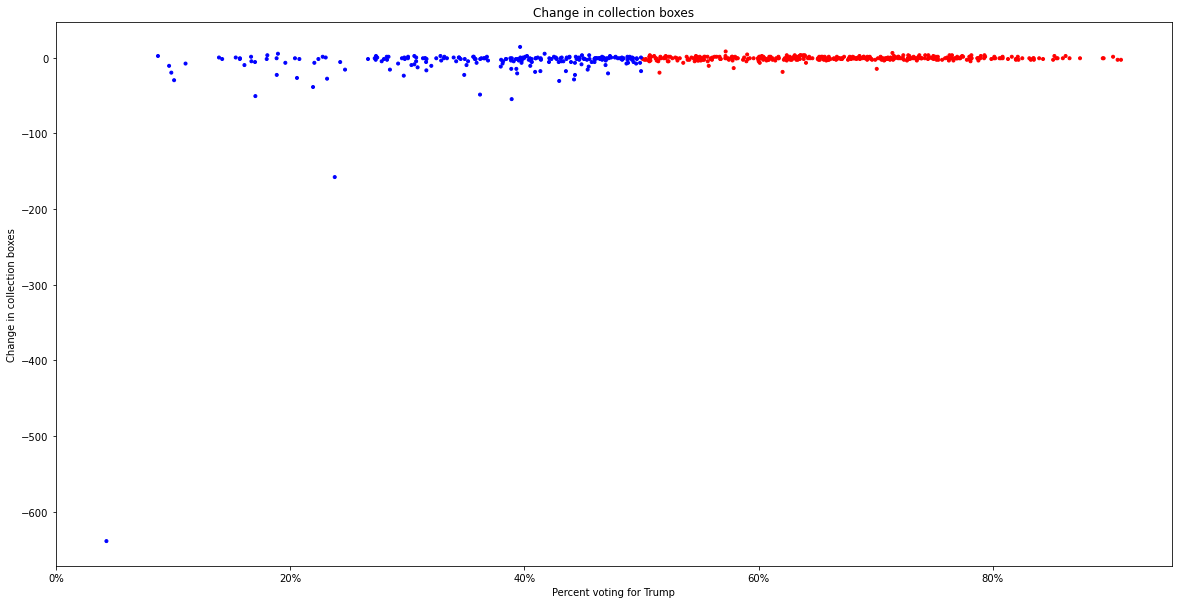

<Figure size 432x288 with 0 Axes>

In [16]:
def plot_group(tdf:pd.DataFrame,title:str="Change in collection boxes",save_as:str=None)->plt.figure:
    '''This accepts a dataframe formatted like res, then plots it.'''
    to_plot = tdf.groupby('GEOID').agg({'net':'sum','r/(rd)':'mean'})
    to_plot.sort_values('net')
    
    mask = to_plot['r/(rd)'] <.5
    to_plot.loc[mask,'color'] = 'b'
    to_plot.loc[~mask,'color'] = 'r'
    f,ax=plt.subplots(1,1)
    
    f.set_figheight(10)
    f.set_figwidth(20)
    
    ax.scatter(
        to_plot['r/(rd)']*100,
        to_plot['net'],
        color=to_plot['color'],
        marker='.'
        
    )
    
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_title(title)
    ax.set_xlabel('Percent voting for Trump')
    ax.set_ylabel('Change in collection boxes')
    plt.show()
    
plot_group(acs)
plt.savefig('Change in collection boxes')

We see two things in this chart. First, there are fewer Democrat leaning counties. Democrats tend to live in areas with higher population density, so this is not surprising. Second, the total net change in collection boxes appears to be higher in Democrat leaning counties.

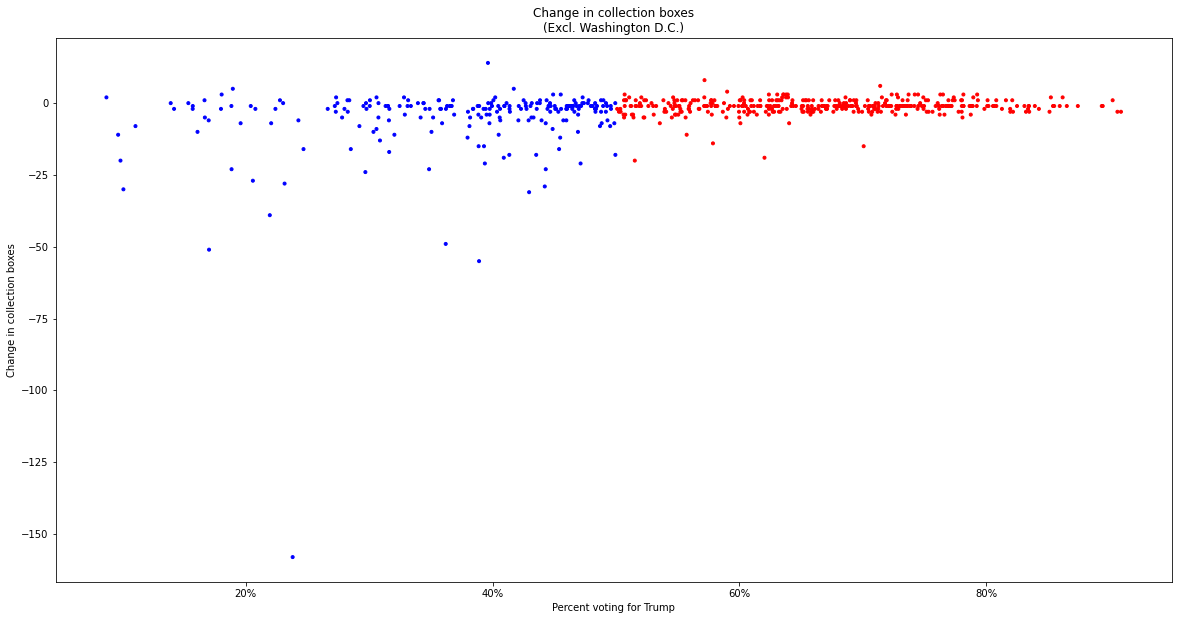

<Figure size 432x288 with 0 Axes>

In [17]:
dc_id = 11001

mask = acs['GEOID']!=dc_id
plot_group(acs[mask],title='Change in collection boxes\n(Excl. Washington D.C.)')

plt.savefig('Change in collection boxes (ex DC)')

I grouped counties by how they voted, then determined how many collection boxes were removed. I reported the number of collection boxes removed based on the percent change. For example, a county who had 100 collection boxes in August 2019 and 95 collection boxes in August 2020 would report a -5% net change in collection boxes. The % of votes for Trump is determined by dividing the number of votes for Trump by the total number of votes excluding third party candidates and null ballots. In other words, I only considered votes for either Clinton or Trump when determining the total number of votes. To make the chart easier to read, I grouped the counties in 5% wide blocks. The first blue bar shows all counties who cast between 5% and 10% of votes for Trump. The last red bar shows counties who cast between 90% and 95% of votes for Trump. The red and blue color shows a simple majority with blue representing a county that voted for Clinton and red showing a county that voted for Trump.

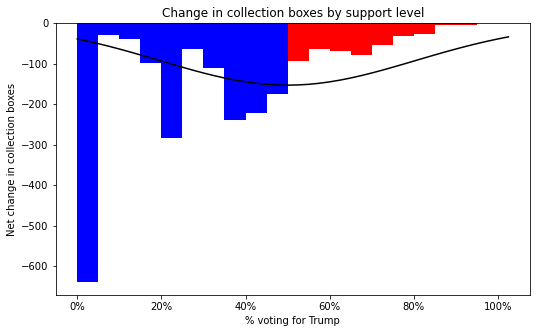

In [34]:
def plot_hist(tdf:pd.DataFrame,title,step:float=.05)->plt.figure:
    '''This accepts a dataframe formatted like res, then plots it.'''
    x = np.arange(0, 1.0+step, step)
    to_plot = tdf.groupby(
        pd.cut(tdf["r/(rd)"], x)
    )['net'].sum().reset_index()
    
    
    #return to_plot
    to_plot['bin'] = to_plot['r/(rd)'].apply(lambda x:x.left)
    
    #return to_plot
    mask = to_plot['bin'] <.5
    
    to_plot['bin'] = to_plot['bin'].apply(lambda x:float(x) + (step/2))
    to_plot.loc[mask,'color'] = 'b'
    to_plot.loc[~mask,'color'] = 'r'
    f,ax=plt.subplots(1,1)
    
    f.set_figheight(5)
    f.set_figwidth(8.5)
    
    ax.bar(
        x=to_plot['bin'].astype(float)*100,
        height=to_plot['net'],
        color=to_plot['color'],
        width=step*100
    )
    ax.set_xlabel('% voting for Trump')
    ax.set_ylabel('Net change in collection boxes')
    
    # Plot normal
    mu = .5
    x = np.arange(0, 1.0+step, step/2)
    variance = np.var(x)
    sigma = math.sqrt(variance)
    ax.plot(x*100, stats.norm.pdf(x, mu, sigma)*np.mean(to_plot['net']),color='k')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_title(title)
    
plot_hist(tot_geoid,title='Change in collection boxes by support level')
tot_geoid.to_pickle('Change in collection boxes by support level.p')
plt.savefig('total change')

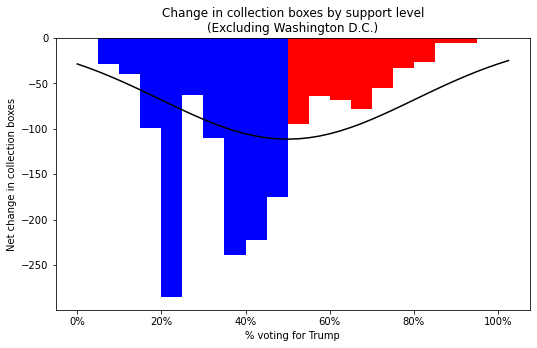

In [19]:
mask = tot_geoid['GEOID']!=dc_id

plot_hist(tot_geoid[mask],title='Change in collection boxes by support level\n(Excluding Washington D.C.)')
plt.savefig('total change')

When looking at only the net change in the number of collection boxes, more collection boxes are removed from Democrat leaning counties.

### Percent change in collection boxes

As an absolute number, Democrat leaning counties saw a larger number of collection boxes removed, but they also have larger populations and have more collection boxes before any changes. To account for this, I will next show the percent change in the number of collection boxes.

In [20]:
acs['Percent Change'] = acs['net']/acs['total_boxes']

In the chart below, I plotted each county by the amount of political support and the net change in collection boxes expressed as a percent. We see more significant changes on the side voting for Trump (> 50% voting for Trump).

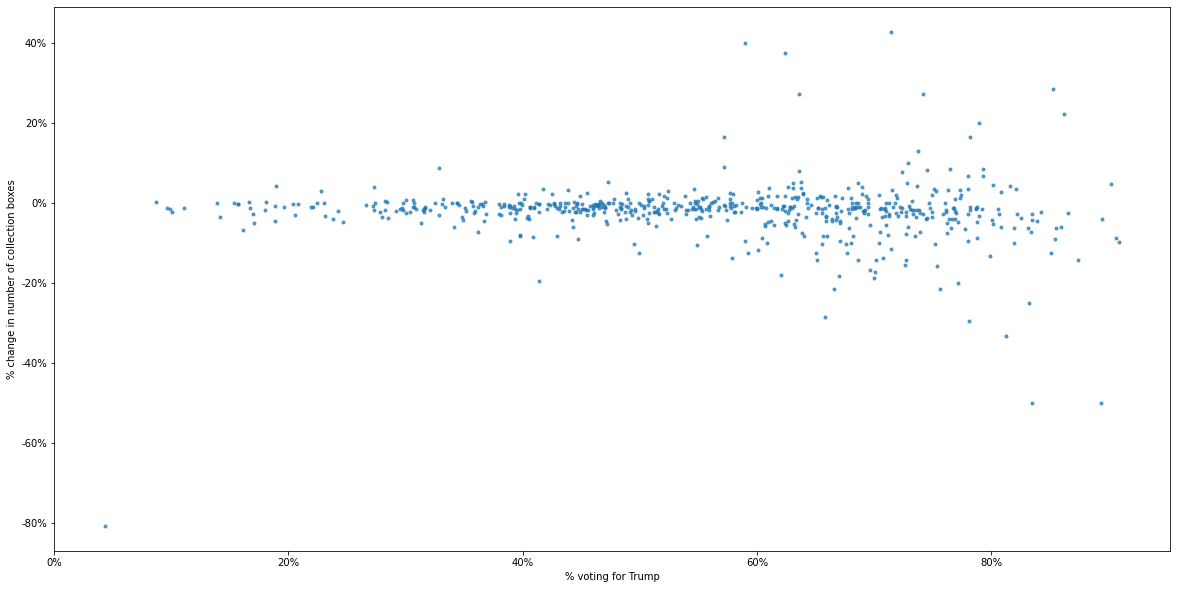

In [21]:
f,ax = plt.subplots(1,1)

f.set_figwidth(20)
f.set_figheight(10)

ax.scatter(
    y=acs['Percent Change']*100,
    x=acs['r/(rd)']*100,
    marker='.',
    alpha=.7
)

ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('% voting for Trump')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% change in number of collection boxes')

plt.show()

Sorting counties by those with the largest percent change, we now see a mix of both Republican and Democrat leaning counties. The changes in Washington DC are still significant.

In [22]:
acs.sort_values('Percent Change')

Population  GEOID    r/(rd)  total_boxes  net                  NAME  \
56       684498  11001  0.043048          790 -639  District of Columbia   
608         981  32009  0.835025            6   -3             Esmeralda   
609         704  38087  0.893827            2   -1                 Slope   
607        1753  30019  0.812918            6   -2               Daniels   
531        2694  49055  0.780922           17   -5                 Wayne   
..          ...    ...       ...          ...  ...                   ...   
491        5511  46087  0.742242           11    3                McCook   
311        3667  31105  0.852564            7    2               Kimball   
493        6506  46101  0.624009            8    3                 Moody   
387        9695  37103  0.590196           10    4                 Jones   
142        6968  19071  0.714243           14    6               Fremont   

     Percent Change  
56        -0.808861  
608       -0.500000  
609       -0.500000  
607       -0.333333  
531       -0.294118  
..              ...  
491        0.272727  
311        0.285714  
493        0.375000  
387        0.400000  
142        0.428571  

[610 rows x 7 columns]

The following block of code groups by level of Trump support, then calculates the percent change. I include charts both with and without Washington DC.

Apart from Washington DC, the counties with the most collection boxes removed were the most Republican leaning counties.

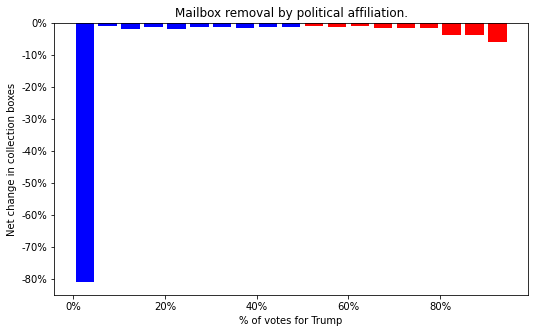

In [32]:
def per_change(tdf,step:float=.05,ax=None,title='Mailbox removal by political affiliation.'):
    '''Accepts a dataframe with total number of collection boxes and the net change.
    Then it bins based on Trump support and plots.'''
    
    x = np.arange(0, 1.0+step, step)
    to_plot = tdf.groupby(
        pd.cut(tdf["r/(rd)"], x)
    )[['net','total_boxes']].sum().reset_index().fillna({'Percent Change':0})
    
    
    to_plot['bin'] = to_plot['r/(rd)'].apply(lambda x:(x.left + (step/2))*100)
    to_plot['Percent Change'] = to_plot['net']/to_plot['total_boxes']
    
    mask = to_plot['bin'].astype(float)<50
    to_plot.loc[mask,'color']='b'
    to_plot.loc[~mask,'color']='r'
    
    if ax is None:
        f,ax=plt.subplots(1,1)
        
    ax.bar(to_plot['bin'],
           to_plot['Percent Change']*100,
           width=4,color=to_plot['color'])
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_title(title)
    ax.set_xlabel('% of votes for Trump')
    ax.set_ylabel('Net change in collection boxes')
    return to_plot

f,ax=plt.subplots(1,1)
f.set_figwidth(8.5)
f.set_figheight(5)
per_change(tot_geoid,ax=ax)
plt.savefig('percent_w_DC')

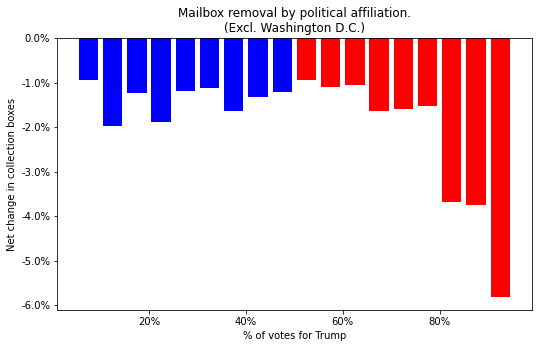

In [33]:
mask = tot_geoid['GEOID'] != dc_id


f,ax=plt.subplots(1,1)
f.set_figwidth(8.5)
f.set_figheight(5)
per_change(tot_geoid[mask],title='Mailbox removal by political affiliation.\n(Excl. Washington D.C.)',ax=ax)
tot_geoid[mask].to_pickle('Mailbox removal by political affiliation.p')

plt.savefig('removal excl DC')

### Population data
I attempted to use visualization about the population and the number of collection boxes. They two figures are highly correlated. This supports the theory that the size of the city is more significant.

As shown in the chart below, counties with a larger population tend to lean Democrat. We also see that the number of collection boxes is highly correlated with the county population.

In [25]:
fig = px.scatter(
    data_frame=acs,
    x='Population',
    y='total_boxes',
    color='r/(rd)',
    log_x=True,
    log_y=True,
    color_continuous_scale='rdylbu_r'
)

fig.show()

In [26]:
acs['Box per capita'] = acs['total_boxes']/acs['Population']
mask = acs['GEOID'] != dc_id

fig = px.scatter(
    title='Box per capita cahnge<br>(Excl. Washington DC)',
    data_frame=acs[mask],
    x='r/(rd)',
    y='Box per capita',
    color='Percent Change'
)

fig.show()

The next two visualization look for trends changes in the number of collection boxes removed or added. The relationship remains unclear after this analysis.

In [27]:
acs['Box per capita'] = acs['total_boxes']/acs['Population']
mask = acs['Percent Change'] > 0

fig = px.scatter(
    data_frame=acs[mask],
    x='r/(rd)',
    y='Box per capita',
    color='Percent Change',
    size='net',
    range_x=(0,1),
    title='Counties with collection boxes added'
)

fig.show()

In [28]:
mask = (acs['Percent Change'] < 0) & (acs['GEOID'] != dc_id)

acs['Boxes removed'] = -acs['net']
fig = px.scatter(
    data_frame=acs[mask],
    x='r/(rd)',
    y='Box per capita',
    color='Percent Change',
    size='Boxes removed',
    range_x=(0,1),
    title='Counties with collection boxes removed<br>(Excluding Washington DC)'
)

fig.show()

### Regression

To clarify the outcome, I created a linear regression excluding Washington DC. Using the political affiliation, population, and the total number of collection boxes, we can predict how many collection boxes were removed from a county.  When considering other factors like population, and the number of collection boxes that the county started with, the percent of people who voted for Trump (`r/(rd)`), is statistically insignificant (P-value .11). There is no evidence that mailbox removals are politically motivated.

In [29]:
mask = acs['GEOID'] != dc_id
x = acs[mask][['Population','r/(rd)','total_boxes']]
x = sm.add_constant(x)
y = acs[mask]['net']
model = sm.OLS(y,x)
results = model.fit()

results.params

const          2.087220
Population    -0.000008
r/(rd)        -2.600430
total_boxes   -0.002923
dtype: float64

In [30]:
results.pvalues

const          4.325771e-02
Population     1.568242e-30
r/(rd)         1.121865e-01
total_boxes    2.689859e-02
dtype: float64

In [31]:
results.rsquared

0.5156589659132349